# Random Forest Regression

## Importing the libraries

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sys
from pylab import rcParams
import seaborn as sb
#np.set_printoptions(threshold=sys.maxsize)

## Importing the dataset

In [5]:
dataset = pd.read_csv('/content/drive/MyDrive/MechML/figure/Plastic_fig.csv')
X = dataset.iloc[:, :4].values # first 4 column
y = dataset.iloc[:, -2].values # stress

In [6]:
dataset

,Radius (A°),Coil diameter (A°),Pitch angle (deg),Pitch length (A°),Number of turns,Total length (A°),Yield stress (Gpa),Failure strain,Toughness (Gpa)
0,8.234107,6.992397,30.640255,30.645917,1.667364,51.097894,1.542979,0.015328,0.000419
1,5.230225,3.883434,29.737529,18.772964,1.337882,25.116002,1.950201,0.029217,0.002186
2,10.638221,8.196173,22.145974,27.204183,0.620406,16.877644,2.216253,0.021797,0.002406
3,14.335574,6.836555,35.100023,63.304466,0.802846,50.823718,1.533672,0.016357,0.005887
4,8.793233,9.003407,33.009667,35.892706,0.970319,34.827380,1.650971,0.024108,0.006398
...,...,...,...,...,...,...,...,...,...
4206,3.834954,4.939353,46.197164,25.124301,9.058188,227.580652,44.903707,0.153592,2.785994
4207,1.733523,2.998306,67.355090,26.108764,9.060878,236.568311,56.759507,0.109915,3.540398
4208,3.964861,3.436653,42.548802,22.866666,9.192425,210.200109,44.466467,0.229816,2.965112
4209,2.944720,2.728278,52.631750,24.227714,9.889336,239.596010,33.544017,0.180354,3.134042


## Data Visualization

In [7]:
%matplotlib inline
rcParams['figure.figsize'] = 5,4
sb.set_style('whitegrid')

[]

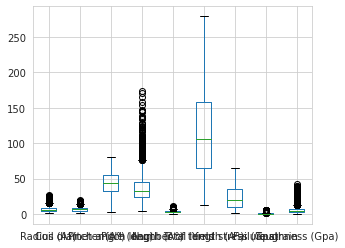

In [8]:
dataset.boxplot(return_type='dict')
plt.plot()

## Outlier Detection
A simple approach is eliminating data that are higher than 1.5*(75%-25%) + 75% or
less than 25% - 1.5*(75%-25%)


In [9]:
pd.options.display.float_format = '{:.2f}'.format
X_df = pd.DataFrame(dataset)
print(X_df.describe())

       Radius (A°)  Coil diameter (A°)  ...  Failure strain  Toughness (Gpa)
count      4211.00             4211.00  ...         4211.00          4211.00
mean          6.65                6.95  ...            0.73             5.74
std           4.12                3.13  ...            0.78             4.94
min           1.45                1.58  ...            0.01             0.00
25%           3.81                4.70  ...            0.23             2.89
50%           5.06                6.51  ...            0.43             3.99
75%           8.33                8.42  ...            0.93             6.59
max          26.38               19.15  ...            6.21            41.64

[8 rows x 9 columns]


## Data Visualization

In [11]:
sb.set(font="Times New Roman", style = 'white')
sb.set_context("paper", font_scale = 6)
sb.pairplot(vars = [r'Radius (A°)', 'Coil diameter (A°)', 'Pitch angle (deg)', 'Pitch length (A°)', 'Failure strain', 'Toughness (GPa)'],
             data = dataset,
             kind = 'scatter',
             diag_kind = "hist",
             diag_kws = {'alpha':.9},
            height = 10,
            aspect = 1,
            plot_kws={"s": 100})

plt.show()
plt.clf()

Output hidden; open in https://colab.research.google.com to view.

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Splitting the dataset into the Training set and Test set

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)

PCA

In [ ]:
from sklearn.decomposition import PCA
pca = PCA()
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)
pca.explained_variance_ratio_

array([0.824, 0.152, 0.021, 0.003])

## Training the Random Forest Regression model on the whole dataset

In [ ]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators = 100, random_state = 41)
regressor.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=41, verbose=0, warm_start=False)

## Predicting the Test set results

In [ ]:
y_pred = regressor.predict(X_test)
np.set_printoptions(precision=3,suppress=True)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[0.863 1.363]
 [2.167 2.838]
 [2.157 1.617]
 ...
 [1.82  1.444]
 [0.234 0.23 ]
 [0.325 0.14 ]]


In [ ]:
y_pred_train = regressor.predict(X_train)
np.set_printoptions(precision=3,suppress=True)
print(np.concatenate((y_pred_train.reshape(len(y_pred_train),1), y_train.reshape(len(y_train),1)),1))

[[0.429 0.426]
 [0.376 0.44 ]
 [1.274 1.355]
 ...
 [0.318 0.266]
 [2.546 2.792]
 [0.111 0.086]]


## Evaluating the Model Performance

In [ ]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, y_pred)

0.23423501207028788

In [ ]:
mean_squared_error(y_train, y_pred_train)

0.030168186931237594

In [ ]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.6200093335907881

In [ ]:
r2_score(y_train, y_pred_train)

0.9527458708093155

In [ ]:
from sklearn.model_selection import learning_curve
train_sizes, train_scores, test_scores = learning_curve(regressor, X, y, cv=5, scoring='neg_mean_squared_error', n_jobs=-1, train_sizes=np.linspace(0.01, 1.0, 50))

In [ ]:
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)

test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

In [ ]:
plt.subplots(1, figsize=(10,10))
plt.plot(train_sizes, train_mean, '--', color="#111111",  label="Training score")
plt.plot(train_sizes, test_mean, color="#111111", label="Cross-validation score")

plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color="#DDDDDD")
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, color="#DDDDDD")

plt.title("Learning Curve")
plt.xlabel("Training Set Size"), plt.ylabel("Accuracy Score"), plt.legend(loc="best")
plt.tight_layout()
plt.show()

## Feature importance

### 1. Default Scikit-learn’s feature importance

In [ ]:
import time
import numpy as np

start_time = time.time()
importances = regressor.feature_importances_
std = np.std([
    tree.feature_importances_ for tree in regressor.estimators_], axis=0)
elapsed_time = time.time() - start_time

print(f"Elapsed time to compute the importances: "
      f"{elapsed_time:.3f} seconds")

In [ ]:
feature_names = list(dataset.columns)[:4]
forest_importances = pd.Series(importances, index=feature_names)

fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

### 2. Permutation Importance using default sklean

In [ ]:
from sklearn.inspection import permutation_importance

result = permutation_importance(
    regressor, X_train, y_train, n_repeats=10, random_state=42, n_jobs=2)
elapsed_time = time.time() - start_time
print(f"Elapsed time to compute the importances: "
      f"{elapsed_time:.3f} seconds")

forest_importances = pd.Series(result.importances_mean, index=feature_names)

In [ ]:
fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=result.importances_std, ax=ax)
ax.set_title("Feature importances using permutation on full model")
ax.set_ylabel("Mean accuracy decrease")
fig.tight_layout()
plt.show()

### 3. Permutation Importance using rfpimp Lib

In [ ]:
pip install rfpimp

In [ ]:
from rfpimp import permutation_importances

def r2(rf, X_train, y_train):
    return r2_score(y_train, regressor.predict(X_train))

perm_imp_rfpimp = permutation_importances(regressor, X_train, y_train, r2)

In [ ]:
fig, ax = plt.subplots()
perm_imp_rfpimp.plot.bar(yerr=result.importances_std, ax=ax)
ax.set_title("Feature importances using permutation on full model")
ax.set_ylabel("Mean accuracy decrease")
fig.tight_layout()
plt.show()

In [ ]:
from sklearn.model_selection import learning_curve
train_sizes, train_scores, test_scores = learning_curve(regressor, X, y, cv=5, scoring='neg_mean_squared_error', n_jobs=-1, train_sizes=np.linspace(0.01, 1.0, 50))

In [ ]:
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)

test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

In [ ]:
plt.subplots(1, figsize=(10,10))
plt.plot(train_sizes, train_mean, '--', color="#111111",  label="Training score")
plt.plot(train_sizes, test_mean, color="#111111", label="Cross-validation score")

plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color="#DDDDDD")
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, color="#DDDDDD")

plt.title("Learning Curve")
plt.xlabel("Training Set Size"), plt.ylabel("Accuracy Score"), plt.legend(loc="best")
plt.tight_layout()
plt.show()